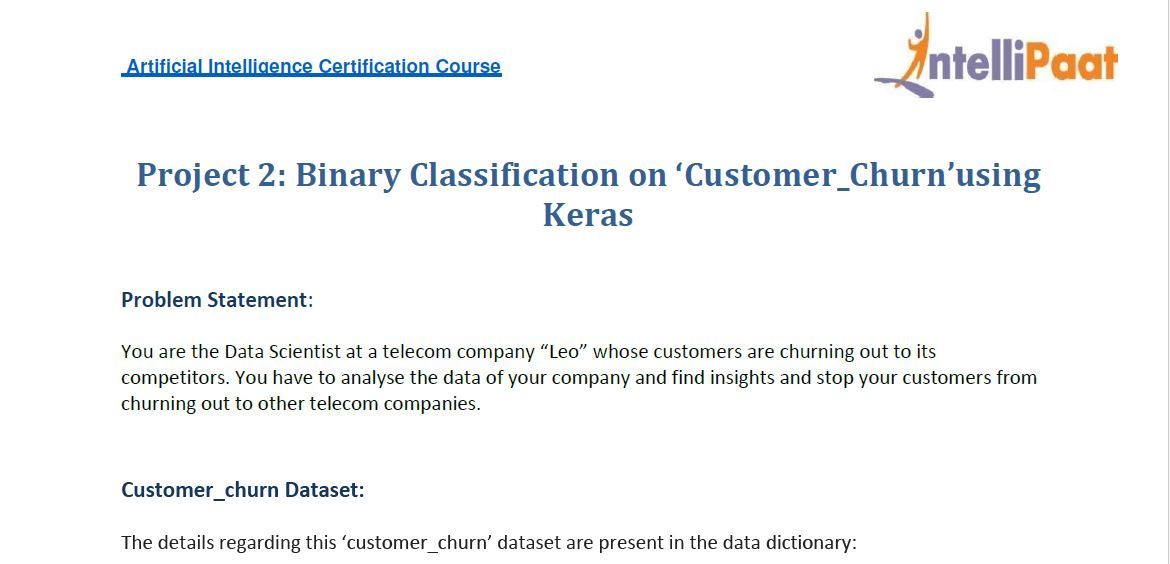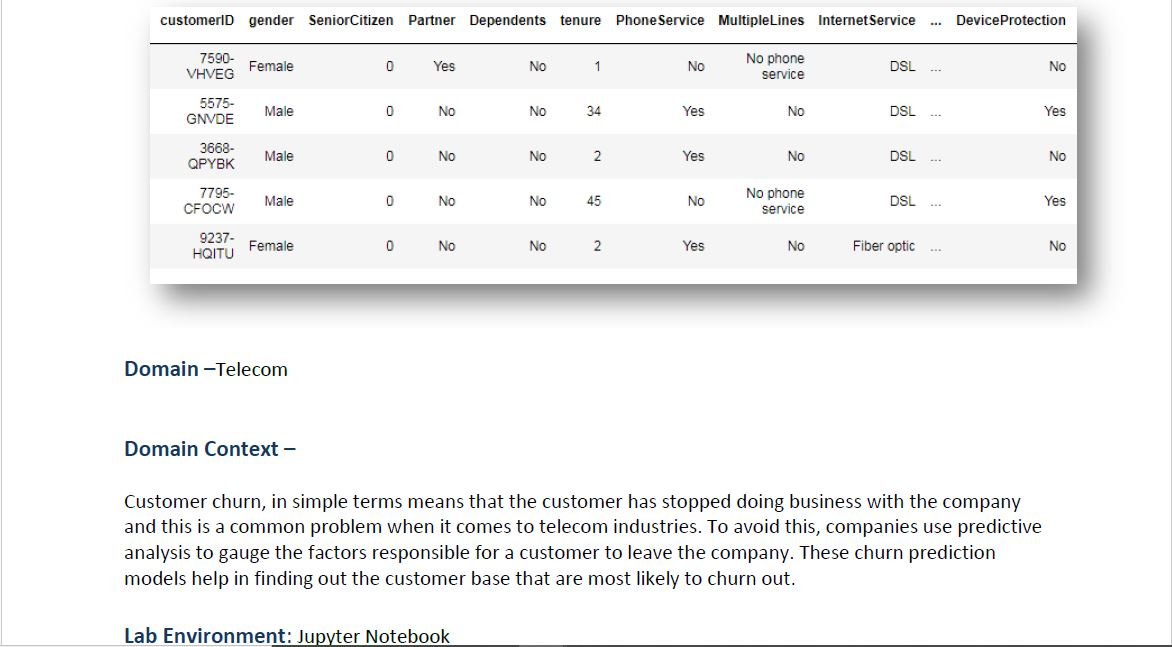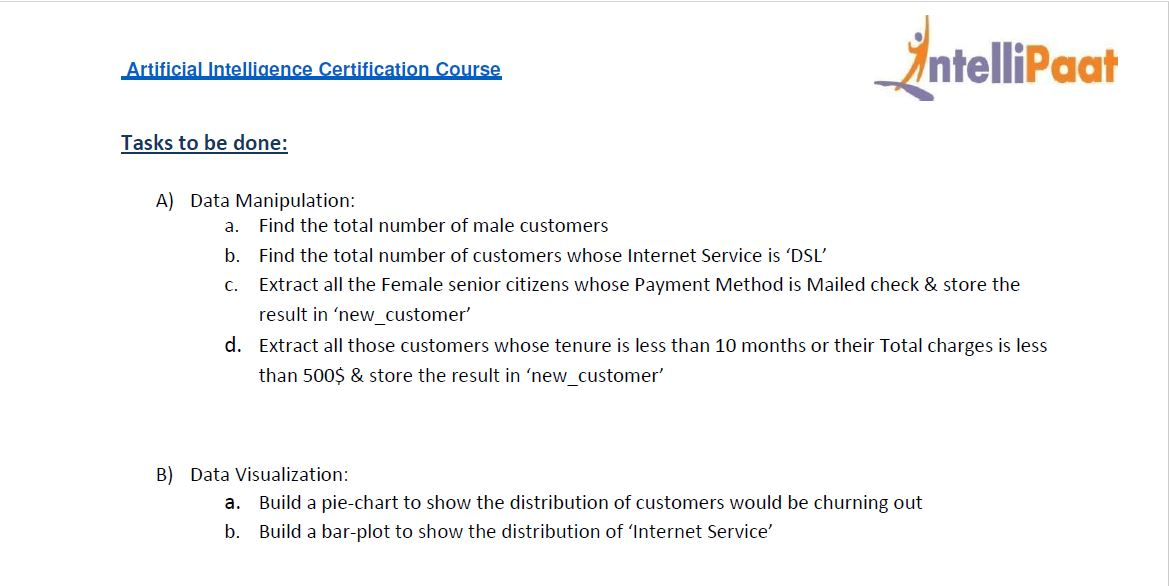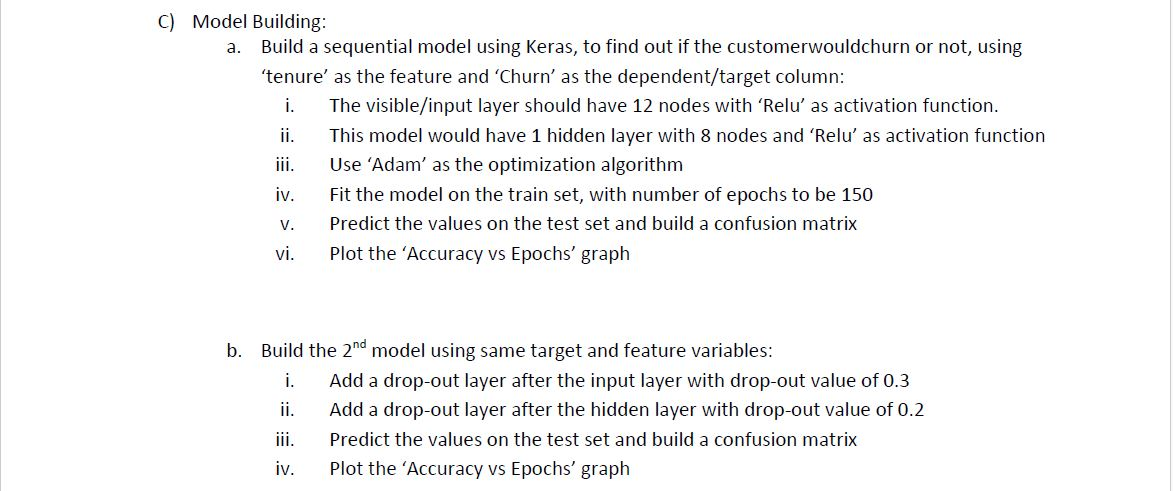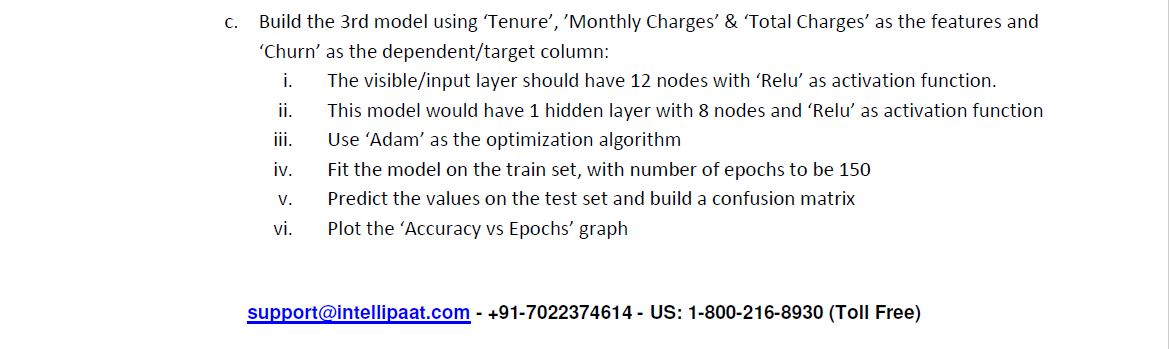

# Importing required library

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle

In [3]:
! kaggle datasets download -d blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 78.5MB/s]


In [4]:
! unzip -q telco-customer-churn.zip

# Downloaded data from the below path in case of using local pc
https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [5]:
# use pandas to import csv file
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# A) Data Manipulation:
    a. Find the total number of male customers
    b. Find the total number of customers whose Internet Service is ‘DSL’
    c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
    result in ‘new_customer’
    d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

#### A.  a. Find the total number of male customers

In [7]:
df[df["gender"]=="Male"]["gender"].count()

3555

#### A. b. Find the total number of customers whose Internet Service is ‘DSL’

In [8]:
df[df["InternetService"]=="DSL"]["InternetService"].count()

2421

#### A. c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’

In [9]:
new_customer = df[(df["gender"]=="Female") & (df["SeniorCitizen"]==1 ) & (df["PaymentMethod"]=="Mailed check" )]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


#### A. d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

#### C.2.  replaceing space with nan and converting TotalCharges from object to float.

In [10]:
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  11


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
new_customer = df[(df["tenure"]<10) & (df["TotalCharges"] < 500.0 ) ]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


# B) Data Visualization:
    a. Build a pie-chart to show the distribution of customers would be churning out
    b. Build a bar-plot to show the distribution of ‘Internet Service’

In [13]:
# df1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# df1.head()

In [14]:
df_churn_out = df.groupby(["Churn"])["Churn"].count()
df_churn_out.to_frame(name="Churn_out_count").reset_index()

,Churn,Churn_out_count
0,No,5174
1,Yes,1869


<Axes: ylabel='Churn'>

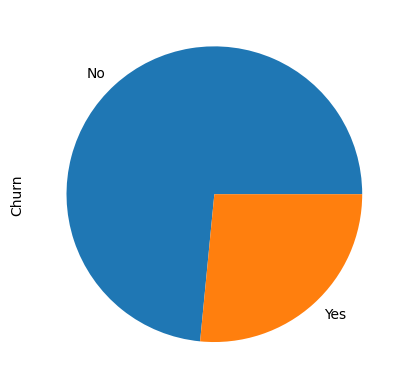

In [15]:
df_churn_out.plot(kind='pie', y="Churn_out_count")

In [16]:
df_InternetService = df.groupby(["InternetService"])["InternetService"].count()
df_InternetService.to_frame(name="InternetServiceWise_count").reset_index()

,InternetService,InternetServiceWise_count
0,DSL,2421
1,Fiber optic,3096
2,No,1526


<Axes: ylabel='InternetService'>

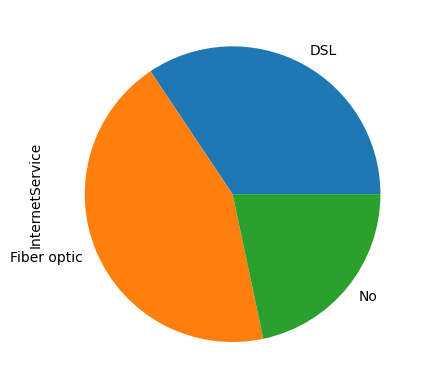

In [17]:
df_InternetService.plot(kind='pie', y="InternetServiceWise_count")

# C) Model Building:
    a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
    i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
    ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
    iii. Use ‘Adam’ as the optimization algorithm
    iv. Fit the model on the train set, with number of epochs to be 150
    v. Predict the values on the test set and build a confusion matrix
    vi. Plot the ‘Accuracy vs Epochs’ graph

## Exploratory Data Analysis before preparing module

#### C.1.  Checking null value in the data set

In [18]:
# df = df.drop('customerID',axis=1)

In [19]:
# checking null value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### C.3.  fill null values with mean in TotalCharges field

In [20]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### C.4.  Creating list for numerical and categorical column saparetly.

In [22]:
#numerical variables

num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df.select_dtypes(include='O').keys())

print(cat)

print(num)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [23]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())
# as we see that there is extra categories which we have to convert it into No.
df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: in

#### C.5.  Used LabelEncoder to conver categorical column into numerica.

In [24]:
# *********************************************
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in cat:
    df[i] = label.fit_transform(df[i])

# *********************************************

In [25]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### C.  a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:


#### C.a.1. Creating tenure as feature column and Churn as target column.

In [27]:
x = df["tenure"] #df.drop('Churn',axis=1)
y = df['Churn']

#### C.a.2. Splitting data into train and test

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(5634,)
(1409,)


#### C.a.3. Importing Keras library and creating model

In [29]:
import tensorflow
import tensorflow as tf
from tensorflow import keras

In [30]:
from keras.models import Sequential
model = Sequential()

#### C.a.4. i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

In [31]:
model.add(keras.layers.Dense(12, input_shape=(1,), activation='relu', name="Input"))

#### C.a.3. ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

In [32]:
model.add(keras.layers.Dense(8, activation='relu',name="Hidden"))

#### C.a.3. ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

In [33]:
model.add(keras.layers.Dense(1, activation='sigmoid', name="Ouput"))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 12)                24        
                                                                 
 Hidden (Dense)              (None, 8)                 104       
                                                                 
 Ouput (Dense)               (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### C.a.3. iii. Use ‘Adam’ as the optimization algorithm

In [35]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

#### C.a.3. iv. Fit the model on the train set, with number of epochs to be 150

In [36]:
# now we fit our model to training data
model.fit(xtrain,ytrain,epochs=150)

Epoch 1/150
177/177 [==============================] - 1s 2ms/step - loss: 0.9610 - accuracy: 0.6198
Epoch 2/150
177/177 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7291
Epoch 3/150
177/177 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.7291
Epoch 4/150
177/177 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7291
Epoch 5/150
177/177 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7291
Epoch 6/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.7291
Epoch 7/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7291
Epoch 8/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7291
Epoch 9/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.7291
Epoch 10/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5861 - accura

In [37]:
history_df = pd.DataFrame(model.history.history)

In [38]:
history_df

,loss,accuracy
0,0.961002,0.619808
1,0.655532,0.729144
2,0.635177,0.729144
3,0.619350,0.729144
4,0.607676,0.729144
...,...,...
145,0.513670,0.750266
146,0.515501,0.751154
147,0.512767,0.751509
148,0.514811,0.747604


#### C.a.3.  v. Predict the values on the test set and build a confusion matrix

In [39]:
y_pred = model.predict(xtest)

45/45 [==============================] - 0s 2ms/step


In [40]:
# evalute the model
model.evaluate(xtest,ytest)

45/45 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7771


[0.4812755882740021, 0.7771469354629517]

In [41]:
ypred_lis = []
for i in y_pred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
# print(ypred_lis)

In [42]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
6418,0,0
1948,1,1
4497,0,0
66,0,0
1705,0,0
924,0,0
1051,0,0
7012,0,0
3723,0,0
4590,0,0


              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1066
           1       0.58      0.30      0.40       343

    accuracy                           0.78      1409
   macro avg       0.69      0.62      0.63      1409
weighted avg       0.75      0.78      0.75      1409



Text(183.22222222222223, 0.5, 'True_number')

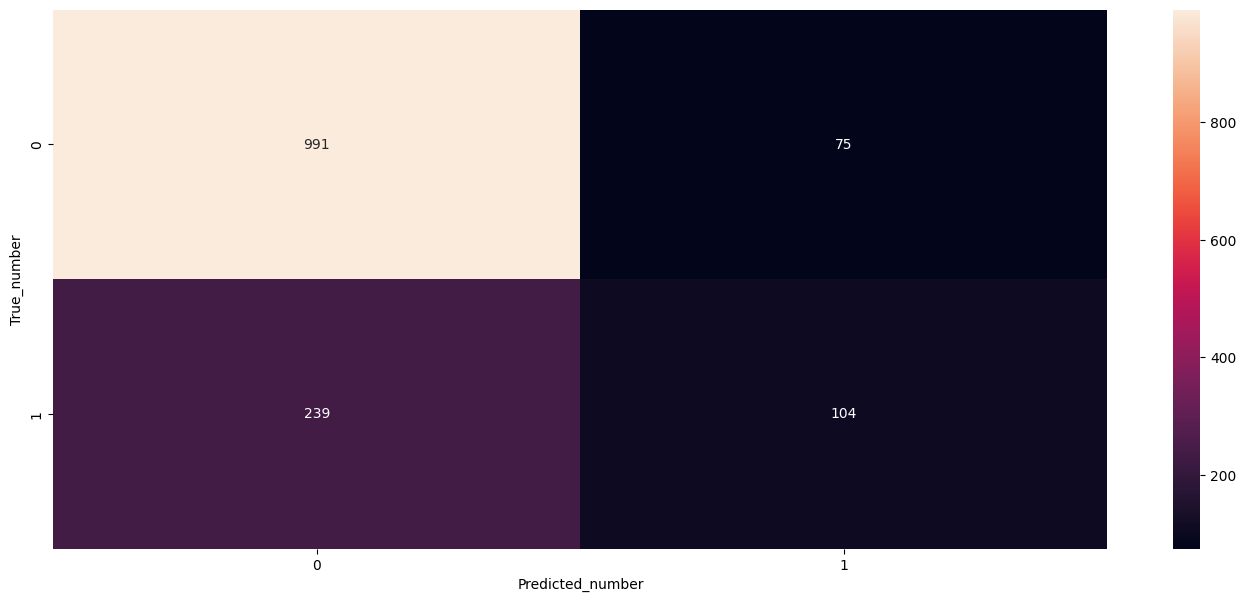

In [43]:
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(ytest,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

#### C.a.3. vi. Plot the ‘Accuracy vs Epochs’ graph

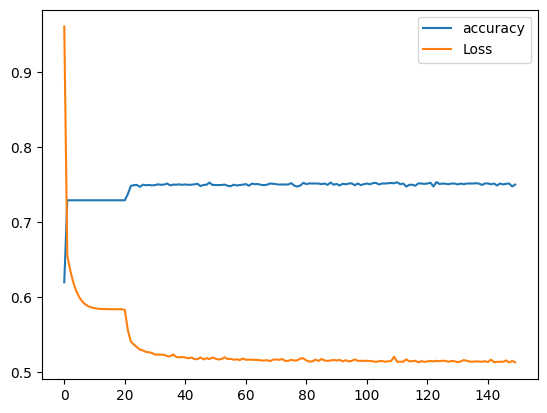

In [44]:
plt.plot(history_df["accuracy"], label="accuracy")
plt.plot(history_df["loss"], label ="Loss")
plt.legend()

# C. b. Build the 2nd model using same target and feature variables:
    i. Add a drop-out layer after the input layer with drop-out value of 0.3
    ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
    iii. Predict the values on the test set and build a confusion matrix
    iv. Plot the ‘Accuracy vs Epochs’ graph

In [45]:
model2 = Sequential()

#### C.b. i. Add a drop-out layer after the input layer with drop-out value of 0.3

In [46]:
model2.add(keras.layers.Dense(12, input_shape=(1,), activation='relu', name="Input"))
model2.add(keras.layers.Dropout(0.3,))#, activation='relu', name="Input")

#### C.b. ii. 1. Add a drop-out layer after the hidden layer with drop-out value of 0.2

In [47]:
model2.add(keras.layers.Dense(8, activation='relu',name="Hidden"))
model2.add(keras.layers.Dropout(0.2,))

#### C.b. ii. 2. Adding output layer

In [48]:
model2.add(keras.layers.Dense(1, activation='sigmoid', name="Ouput"))

#### C.b. ii.3. Checking module summary

In [49]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 12)                24        
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 Hidden (Dense)              (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 Ouput (Dense)               (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### C.b. ii. 4. Use ‘Adam’ as the optimization algorithm

In [50]:
# time for compilation of neural net.
model2.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

#### C.b. ii. 5. Fit the model on the train set, with number of epochs to be 150

In [51]:
# now we fit our model to training data
model2.fit(xtrain,ytrain,epochs=150)

Epoch 1/150
177/177 [==============================] - 1s 2ms/step - loss: 1.5652 - accuracy: 0.5721
Epoch 2/150
177/177 [==============================] - 0s 2ms/step - loss: 0.8463 - accuracy: 0.6558
Epoch 3/150
177/177 [==============================] - 1s 3ms/step - loss: 0.6807 - accuracy: 0.6961
Epoch 4/150
177/177 [==============================] - 1s 4ms/step - loss: 0.6271 - accuracy: 0.7073
Epoch 5/150
177/177 [==============================] - 1s 4ms/step - loss: 0.5887 - accuracy: 0.7155
Epoch 6/150
177/177 [==============================] - 1s 4ms/step - loss: 0.5796 - accuracy: 0.7162
Epoch 7/150
177/177 [==============================] - 1s 5ms/step - loss: 0.5741 - accuracy: 0.7196
Epoch 8/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5577 - accuracy: 0.7204
Epoch 9/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7201
Epoch 10/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5578 - accura

#### C.b. ii. 6. Storing module history in history_df data frame

In [52]:
history_df = pd.DataFrame(model2.history.history)

In [53]:
history_df

,loss,accuracy
0,1.565225,0.572062
1,0.846320,0.655840
2,0.680654,0.696131
3,0.627141,0.707313
4,0.588680,0.715477
...,...,...
145,0.527170,0.729144
146,0.532598,0.729144
147,0.531468,0.729144
148,0.531071,0.729144


#### C.b. iii. Predict the values on the test set and build a confusion matrix

In [54]:
y_pred = model2.predict(xtest)

45/45 [==============================] - 0s 2ms/step


In [55]:
# evalute the model
model2.evaluate(xtest,ytest)

45/45 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7566


[0.50002121925354, 0.7565649151802063]

In [56]:
ypred_lis = []
for i in y_pred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
# print(ypred_lis)

In [57]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
6418,0,0
1948,1,0
4497,0,0
66,0,0
1705,0,0
924,0,0
1051,0,0
7012,0,0
3723,0,0
4590,0,0


              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1066
           1       0.00      0.00      0.00       343

    accuracy                           0.76      1409
   macro avg       0.38      0.50      0.43      1409
weighted avg       0.57      0.76      0.65      1409



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(183.22222222222223, 0.5, 'True_number')

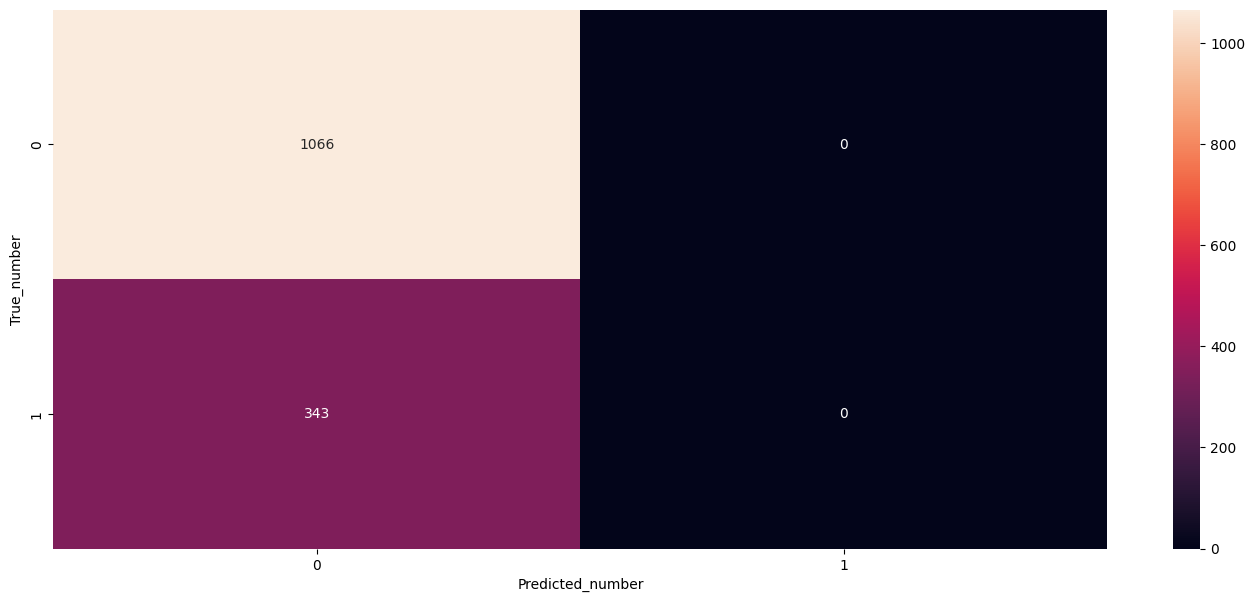

In [58]:
# checking for performance metrices
# #importing classification_report and confusion metrics
# from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(ytest,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

#### C.b. vi. Plot the ‘Accuracy vs Epochs’ graph

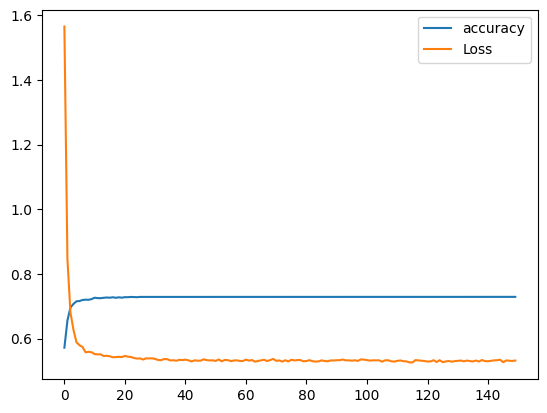

In [59]:
plt.plot(history_df["accuracy"], label="accuracy")
plt.plot(history_df["loss"], label ="Loss")
plt.legend()

# C. c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:
    i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
    ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
    iii. Use ‘Adam’ as the optimization algorithm
    iv. Fit the model on the train set, with number of epochs to be 150
    v. Predict the values on the test set and build a confusion matrix
    vi. Plot the ‘Accuracy vs Epochs’ graph

#### C.c. 1 Creating dataset as  ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:

In [60]:
# df.info()

In [61]:
# ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features
x = df.drop(columns=["customerID","gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",'Churn'],axis=1)
y = df['Churn']

In [62]:
x.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [63]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

#### C.c.2. Splitting data into train and test

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(5634, 3)
(1409, 3)


In [65]:
model3 = Sequential()

#### C.c.i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

In [66]:
model3.add(keras.layers.Dense(12, input_shape=(3,), activation='relu', name="Input"))

#### C.c. ii.1. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

In [67]:
model3.add(keras.layers.Dense(8, activation='relu',name="Hidden"))

#### C.c. ii. 2 This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

In [68]:
model3.add(keras.layers.Dense(1, activation='sigmoid', name="Ouput"))

In [69]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 12)                48        
                                                                 
 Hidden (Dense)              (None, 8)                 104       
                                                                 
 Ouput (Dense)               (None, 1)                 9         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### C.c. iii. Use ‘Adam’ as the optimization algorithm

In [70]:
# time for compilation of neural net.
model3.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

#### C.c. iv. 1. Fit the model on the train set, with number of epochs to be 150

In [71]:
# now we fit our model to training data
model3.fit(xtrain,ytrain,epochs=150)

Epoch 1/150
177/177 [==============================] - 1s 2ms/step - loss: 3.8990 - accuracy: 0.6471
Epoch 2/150
177/177 [==============================] - 0s 2ms/step - loss: 0.9128 - accuracy: 0.6580
Epoch 3/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7226
Epoch 4/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7245
Epoch 5/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7302
Epoch 6/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7371
Epoch 7/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7620
Epoch 8/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7693
Epoch 9/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7622
Epoch 10/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4938 - accura

#### C.c iv. 2. Storing module history in history_df data frame

In [72]:
model3_history_df = pd.DataFrame(model3.history.history)

In [73]:
model3_history_df

,loss,accuracy
0,3.898987,0.647142
1,0.912828,0.657969
2,0.598960,0.722577
3,0.587067,0.724530
4,0.542429,0.730209
...,...,...
145,0.459745,0.782215
146,0.467886,0.783280
147,0.457946,0.784523
148,0.463934,0.782038


#### C.c. v. Predict the values on the test set and build a confusion matrix

In [74]:
y_pred = model3.predict(xtest)

45/45 [==============================] - 0s 1ms/step


In [75]:
# evalute the model
model3.evaluate(xtest,ytest)

45/45 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7999


[0.44667109847068787, 0.799858033657074]

In [76]:
ypred_lis = []
for i in y_pred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
# print(ypred_lis)

In [77]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
6418,0,0
1948,1,1
4497,0,0
66,0,0
1705,0,0
924,0,0
1051,0,0
7012,0,0
3723,0,0
4590,0,0


              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1066
           1       0.66      0.36      0.47       343

    accuracy                           0.80      1409
   macro avg       0.74      0.65      0.67      1409
weighted avg       0.78      0.80      0.78      1409



Text(158.22222222222223, 0.5, 'True_number')

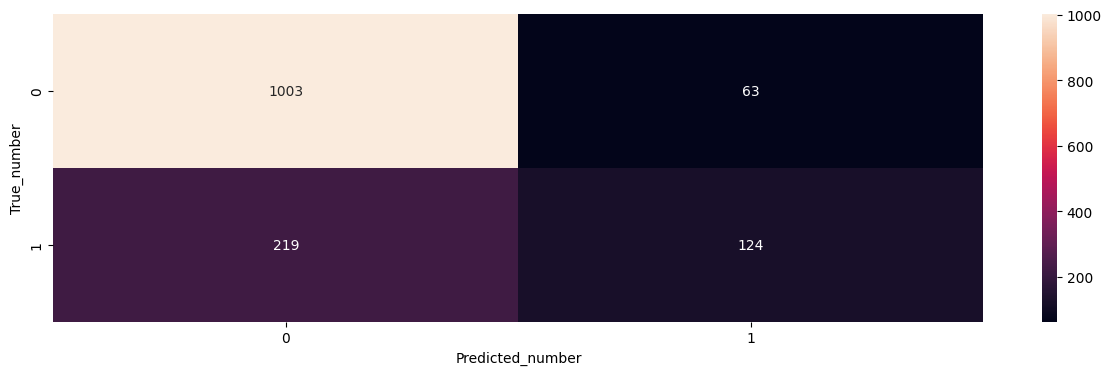

In [78]:
# checking for performance metrices
print(classification_report(ytest,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (15,4))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

#### C.c. vi. Plot the ‘Accuracy vs Epochs’ graph

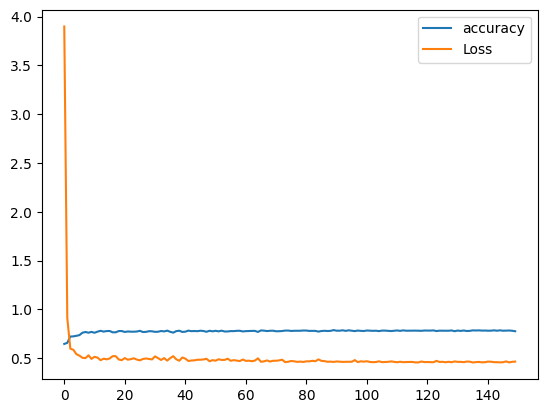

In [79]:
plt.plot(model3_history_df["accuracy"], label="accuracy")
plt.plot(model3_history_df["loss"], label ="Loss")
plt.legend()